<a href="https://colab.research.google.com/github/Anuskath/Anuskath/blob/main/Zenitsu_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Load Image**

In [ ]:
def read_file(file_name):
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

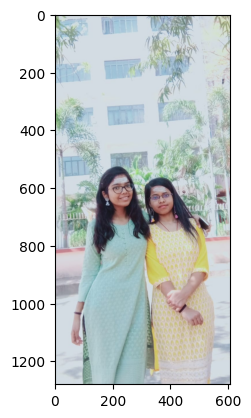

In [ ]:
file_name ="/content/IMG-20240308-WA0003.jpg"
img = read_file(file_name)
org_img = np.copy(img)

In [ ]:
def edge_mask(img,line_size,blur_value):
    """ input: input your image:         output: EDGES of Images  """
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)

    edges = cv2.adaptiveThreshold( gray_blur, 255,cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,line_size,blur_value)
    return edges

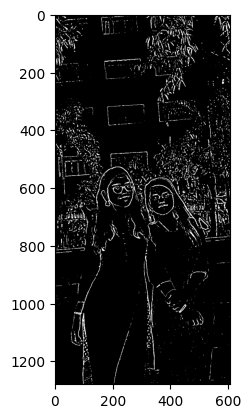

In [ ]:
line_size,blur_value= 5,5
edges = edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

**Reduce the color palette**

In [ ]:
def color_quantization(img,k):
    #Transform the image
 data = np.float32(img).reshape((-1,3))
    # Determine Criteria
 criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
  # Implementing K-means
 ret , label , center = cv2.kmeans( data ,k,None , criteria ,10,cv2.KMEANS_RANDOM_CENTERS )
 center = np.uint8(center)

 result = center[label.flatten()]
 result = result.reshape(img.shape)
 return result

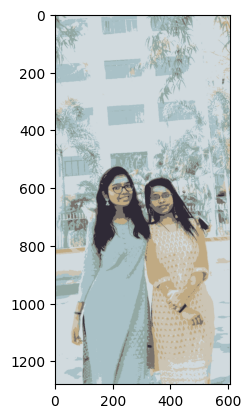

In [ ]:
img = color_quantization(img , k=7)

plt.imshow(img)
plt.show()

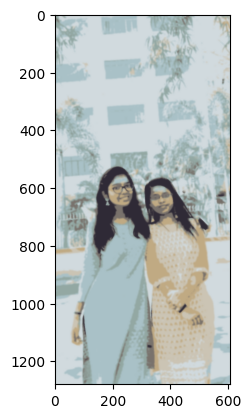

In [ ]:
# Reduce the noise
blurred = cv2.bilateralFilter(img, d=9,sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

**Combine edge mask with the quantise image**

In [ ]:
def cartoon():
    c= cv2.bitwise_and(blurred,blurred,mask= edges)
    plt.imshow(c)
    # plt.title("cartoons")
    plt.show()

    plt.imshow(org_img)
    plt.title("original")
    plt.show()


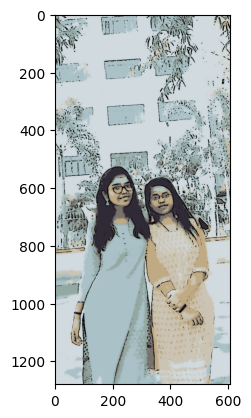

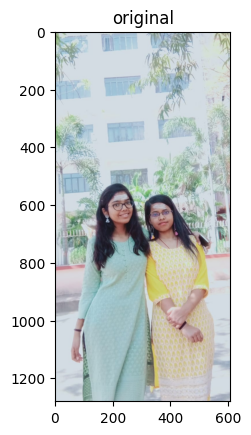

In [ ]:
cartoon()